## DFO Nutrient Comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import netCDF4 as nc
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import gsw
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import matplotlib.dates as mdates
import cmocean as cmo
import scipy.interpolate as sinterp
import pickle
from matplotlib.colors import LogNorm

mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)
mpl.rc('legend', fontsize=10)
mpl.rc('axes', titlesize=10)
mpl.rc('axes', labelsize=10)
mpl.rc('figure', titlesize=10)
mpl.rc('font', size=10)
%matplotlib inline

#### Redo with new dataset including all ctd casts

for now, load DFO matched data

In [2]:
dataDFO=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataDFOPhys.pkl','rb'))
dataPSF=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataPSFPhys.pkl','rb'))
#dataHakai=pickle.load(open('/data/eolson/MEOPAR/SS36runs/calcFiles/evalMatches/dataHakaiPhys.pkl','rb'))

In [3]:
#cm1=plt.get_cmap('PuBuGn')
cm1=cmo.cm.thermal

In [4]:
iiTd=(~np.isnan(dataDFO['mod_votemper']))&(~np.isnan(dataDFO['ConsT']))
#iiTh=(~np.isnan(dataHakai['mod_votemper']))&(~np.isnan(dataHakai['ConsT']))
iiTp=(~np.isnan(dataPSF['mod_votemper']))&(~np.isnan(dataPSF['ConsT']))
iiSd=(~np.isnan(dataDFO['mod_vosaline']))&(~np.isnan(dataDFO['AbsSal']))
#iiSh=(~np.isnan(dataHakai['mod_vosaline']))&(~np.isnan(dataHakai['AbsSal']))
iiSp=(~np.isnan(dataPSF['mod_vosaline']))&(~np.isnan(dataPSF['AbsSal']))

In [5]:
#print('T min model:',np.min((np.min(dataDFO.loc[iiTd,['mod_votemper']]),np.min(dataHakai.loc[iiTh,['mod_votemper']]),np.min(dataPSF.loc[iiTp,['mod_votemper']]))))
#print('T min obs:',np.min((np.min(dataDFO.loc[iiTd,['ConsT']]),np.min(dataHakai.loc[iiTh,['ConsT']]),np.min(dataPSF.loc[iiTp,['ConsT']]))))
#print('T max model:',np.max((np.max(dataDFO.loc[iiTd,['mod_votemper']]),np.max(dataHakai.loc[iiTh,['mod_votemper']]),np.max(dataPSF.loc[iiTp,['mod_votemper']]))))
#print('T max obs:',np.max((np.max(dataDFO.loc[iiTd,['ConsT']]),np.max(dataHakai.loc[iiTh,['ConsT']]),np.max(dataPSF.loc[iiTp,['ConsT']]))))

In [6]:
#print('S min model:',np.min((np.min(dataDFO['mod_vosaline']),np.min(dataHakai['mod_vosaline']),np.min(dataPSF['mod_vosaline']))))
#print('S min obs:',np.min((np.min(dataDFO['AbsSal']),np.min(dataHakai['AbsSal']),np.min(dataPSF['AbsSal']))))
#print('S max model:',np.max((np.max(dataDFO['mod_vosaline']),np.max(dataHakai['mod_vosaline']),np.max(dataPSF['mod_vosaline']))))
#print('S max obs:',np.max((np.max(dataDFO['AbsSal']),np.max(dataHakai['AbsSal']),np.max(dataPSF['AbsSal']))))

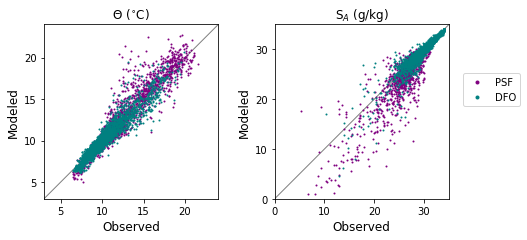

In [7]:
fig = plt.figure(figsize = (7.5,3.4))
gs1=gridspec.GridSpec(1,3,left=.08,right=.83,bottom=.03,top=.98,
                      wspace=.2,width_ratios=[1,.05,1])
axT=fig.add_subplot(gs1[0,0])
axS = fig.add_subplot(gs1[0,2])

axT.plot((0,25),(0,25),'-',color='gray',linewidth=1)
axS.plot((0,36),(0,36),'-',color='gray',linewidth=1)
aalpha=1
ms=2
pT,=axT.plot(dataPSF['ConsT'].values,dataPSF['mod_votemper'].values,'.',alpha=aalpha,
             label='PSF',color='purple',markersize=ms)
pS,=axS.plot(dataPSF['AbsSal'].values,dataPSF['mod_vosaline'].values,'.',alpha=aalpha,
             label='PSF',color='purple',markersize=ms)
p,=axS.plot(100,100,'.',alpha=1,label='PSF',color='purple')
dT,=axT.plot(dataDFO['ConsT'].values,dataDFO['mod_votemper'].values,'.',alpha=aalpha,
             label='DFO',color='teal',markersize=ms)
dS,=axS.plot(dataDFO['AbsSal'].values,dataDFO['mod_vosaline'].values,'.',alpha=aalpha,
             label='DFO',color='teal',markersize=ms)
d,=axS.plot(100,100,'.',alpha=1,label='DFO',color='teal')
#hT,=axT.plot(dataHakai['ConsT'].values,dataHakai['mod_votemper'].values,'.',alpha=aalpha,
#             label='Hakai',color='orange',markersize=ms)
#hS,=axS.plot(dataHakai['AbsSal'].values,dataHakai['mod_vosaline'].values,'.',alpha=aalpha,
#             label='Hakai',color='orange',markersize=ms)
#h,=axS.plot(100,100,'.',alpha=1,label='Hakai',color='orange')
L=plt.legend(handles=[p,d],bbox_to_anchor=[1.05,.75])

ntick=np.arange(0,36,10)
ntickl=[str(i) for i in ntick]
axS.set_xlim((0,35))
axS.set_ylim((0,35))
axS.set_xticks(ntick)
axS.set_xticklabels(ntickl)
axS.set_yticks(ntick)
axS.set_yticklabels(ntickl)
    
stick=np.arange(5,25,5)
stickl=[str(i) for i in stick]
axT.set_xlim((3,24))
axT.set_ylim((3,24))
axT.set_xticks(stick)
axT.set_xticklabels(stickl)
axT.set_yticks(stick)
axT.set_yticklabels(stickl)

for ax in (axT,axS):
    ax.set_aspect(1, adjustable='box')
    
axT.set_ylabel('Modeled',fontsize=12)
axS.set_ylabel('Modeled',fontsize=12)
axT.set_xlabel('Observed',fontsize=12)
axS.set_xlabel('Observed',fontsize=12)

axS.set_title('S$_A$ (g/kg)',fontsize=12)
axT.set_title('$\Theta$ ($^{\circ}$C)',fontsize=12)

fig.savefig('/data/eolson/results/MEOPAR/biomodelevalpaper/figsEval/EvalTSPoster.eps',dpi=400,transparent=True)